# The Sparks Foundation - GRIP : Prediction using Supervised Learning

# Author : Kumari Pritika

## Task-1 :- Predict the percentage of marks that a student is expected to score based upon the number of hours they studied

### Dataset can be found from " http://bit.ly/w-data "

### In this notebook i am going to build a simple linear regression model to predict marks scored by a student using no of Hours that he studies as a predictor variable.

# Step1: Reading and Understanding Data 

In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# reading the data
df = pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step2 : Visuallising the Data

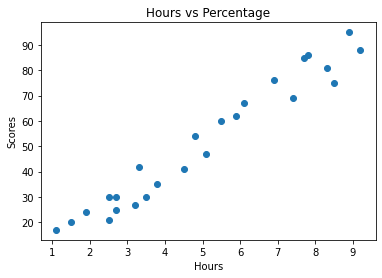

In [7]:
#ploting the data
plt.scatter(x = 'Hours',y = 'Scores' ,data = df)
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Step3: Performing Simple Linear Regression

In [8]:
X = df['Hours']
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [9]:
y = df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Splitting the data set into Training and Test sets

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)

In [11]:
X_train.shape

(17,)

In [12]:
X_train = X_train.values.reshape(-1,1)
X_train.shape

(17, 1)

### Building the Linear Regression Model for Training Set

In [13]:
reg_model = LinearRegression()

In [14]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [15]:
m = reg_model.coef_
print('Slope is ',m)

Slope is  [9.87171443]


In [16]:
c = reg_model.intercept_
print('Intercept is',c)

Intercept is 1.495142109236383


## The Linear Regression Model is
##                    Scores = 9.87171443*Hours + 1.495142109236383     

### Prediction on Training set 

In [17]:
y_train_pred= reg_model.predict(X_train)
y_train_pred

array([92.31491485, 45.91785704, 36.04614261, 78.49451465, 26.17442818,
       51.84088569, 28.14877107, 12.35402798, 20.25139952, 61.71260012,
       33.08462828, 77.50734321, 26.17442818, 89.35340052, 55.78957147,
       85.40471475, 83.43037187])

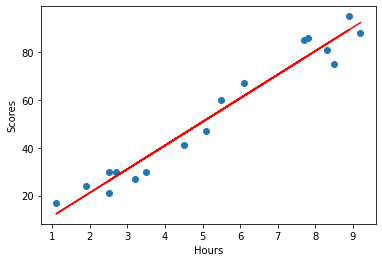

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Testing the Linear regression  Testing set

In [19]:
X_test.shape

(8,)

In [20]:
X_test = X_test.values.reshape(-1,1)

In [21]:
X_test.shape

(8, 1)

In [22]:
y_test_pred = reg_model.predict(X_test)
y_test_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

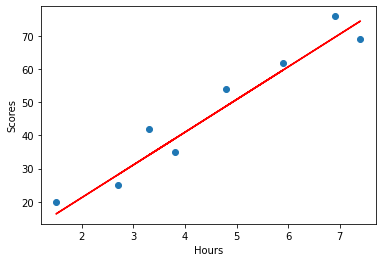

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Step4 : Predicting Score using Linear Regression Model 

In [24]:
hour = [[9.25]]
score = reg_model.predict(hour)
print('Score obtained by the student who studies for 9.24 hr per day is',score[0])

Score obtained by the student who studies for 9.24 hr per day is 92.80850057353504


## Hence the Predicted Score is 92.80850057353504

# Step5 : Evaluating the Model

In [25]:
# rsquared on the training set
r2_score_train = r2_score(y_true = y_train,y_pred = y_train_pred)
print('The R-Squared for training set is',r2_score_train)

The R-Squared for training set is 0.9570735354094693


In [26]:
# rsquared on the test set
r2_score_train = r2_score(y_true = y_test,y_pred = y_test_pred)
print('The R-Squared for testing set is',r2_score_train)

The R-Squared for testing set is 0.9309458862687437


In [27]:
print('The Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Root Mean Squared Error is: 5.0673878451608445


# Thank You